In [ ]:
import os
import cv2
import random
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.image as pltimg
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
DATA_DIR = './Mask Dataset'
TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'train')
VALID_DATA_DIR = os.path.join(DATA_DIR, 'valid')
TEST_DATA_DIR = os.path.join(DATA_DIR, 'test')

In [ ]:
IMG_SIZE = 227
CATEGORIES = []
for i in os.listdir(TRAIN_DATA_DIR):
    CATEGORIES.append(i)   
print(CATEGORIES)

['WithMask', 'WithoutMask']


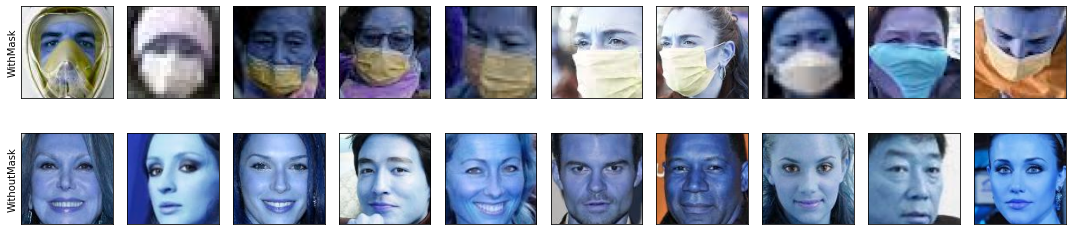

In [ ]:
plt.figure(figsize=(15,4))
   i=0
    for c in CATEGORIES:  
    path = os.path.join(TRAIN_DATA_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(2,10,i+1)
        plt.imshow(img_array)
        if i%10 == 0:
        plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])

        i += 1
        if i%10 == 0:
            break
plt.tight_layout()        
plt.show() 

In [ ]:
training_data = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c)
    class_num = CATEGORIES.index(c) # 0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   # read the image
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize the image
            training_data.append([img_resized, class_num]) # [ [img, 0], [], [], [], ...., []]
        except WException as e:
            pass
        
print(len(training_data))

100%|██████████| 5000/5000 [00:03<00:00, 1460.58it/s]

10000


In [ ]:
valid_data = []
for c in CATEGORIES:
    path = os.path.join(VALID_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            valid_data.append([img_resized, class_num])
        except WException as e:
            pass
        
print(len(valid_data))

100%|██████████| 400/400 [00:00<00:00, 1153.59it/s]

800


In [ ]:
test_data = []
for c in CATEGORIES:
    path = os.path.join(TEST_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            test_data.append([img_resized, class_num])
        except WException as e:
            pass
        
print(len(test_data))

100%|██████████| 509/509 [00:00<00:00, 918.25it/s] 

992


In [ ]:
random.shuffle(training_data)
random.shuffle(valid_data)
random.shuffle(test_data)

In [ ]:
X_train = []
Y_train = []
for img, label in training_data:
    X_train.append(img)
    Y_train.append(label) 
X_train = np.array(X_train).astype('float32').reshape(-1,227,227,3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (10000, 227, 227, 3) Y_train= (10000,)


In [ ]:
X_valid = []
Y_valid = []
for img, label in valid_data:
    X_valid.append(img)
    Y_valid.append(label)   
X_valid = np.array(X_valid).astype('float32').reshape(-1,227,227,3)
Y_valid = np.array(Y_valid)

print(f"X_valid= {X_valid.shape} Y_valid= {Y_valid.shape}")

X_valid= (800, 227, 227, 3) Y_valid= (800,)


In [ ]:
X_test = []
Y_test = []

for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)

X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_test = np.array(Y_test)

print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_test= (992, 227, 227, 3) Y_test= (992,)


In [ ]:
np.random.seed(1500)
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'
%matplotlib inline

In [ ]:
#Normalize
X_train_norm, X_valid_norm, X_test_norm = X_train-mean_img, X_valid-mean_img, X_test-mean_img

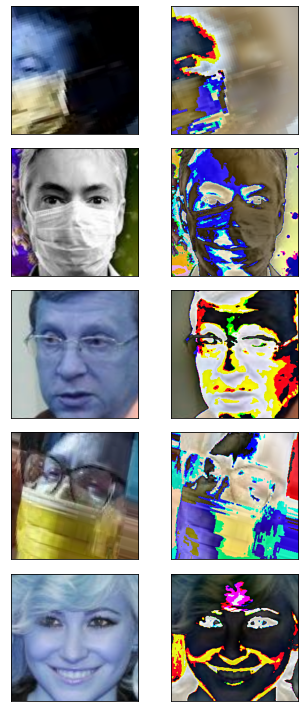

In [ ]:
#Preprocessed img
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([]) 
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    c += 2  
plt.tight_layout()
plt.show()

In [ ]:
#Parameters Identify
tf.compat.v1.disable_eager_execution()
model = keras.Sequential
([
    keras.Input(shape=X_train.shape[1:]),
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(2),
    layers.Activation('softmax')
])
model.summary()

In [ ]:
h = model.fit(x=X_train_norm, y=Y_train, epochs=20, validation_data=(X_valid_norm, Y_valid), batch_size=32)

Train on 10000 samples, validate on 800 samples
Epoch 1/20
10000/10000 [==============================] - ETA: 0s - loss: 0.3382 - accuracy: 0.9143

D:\IDE\Anaconda\envs\cvprEnv\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


10000/10000 [==============================] - 81s 8ms/sample - loss: 0.3382 - accuracy: 0.9143 - val_loss: 0.0735 - val_accuracy: 0.9725
Epoch 2/20
10000/10000 [==============================] - 28s 3ms/sample - loss: 0.1206 - accuracy: 0.9632 - val_loss: 0.0859 - val_accuracy: 0.9800
Epoch 3/20
10000/10000 [==============================] - 28s 3ms/sample - loss: 0.0928 - accuracy: 0.9681 - val_loss: 0.0291 - val_accuracy: 0.9887
Epoch 4/20
10000/10000 [==============================] - 29s 3ms/sample - loss: 0.0670 - accuracy: 0.9784 - val_loss: 0.0309 - val_accuracy: 0.9887
Epoch 5/20
10000/10000 [==============================] - 29s 3ms/sample - loss: 0.0528 - accuracy: 0.9837 - val_loss: 0.0170 - val_accuracy: 0.9950
Epoch 6/20
10000/10000 [==============================] - 29s 3ms/sample - loss: 0.0475 - accuracy: 0.9851 - val_loss: 0.0231 - val_accuracy: 0.9925
Epoch 7/20
10000/10000 [==============================] - 30s 3ms/sample - loss: 0.0568 - accuracy: 0.9832 - val_loss

INFO:tensorflow:Assets written to: fitted_model\assets


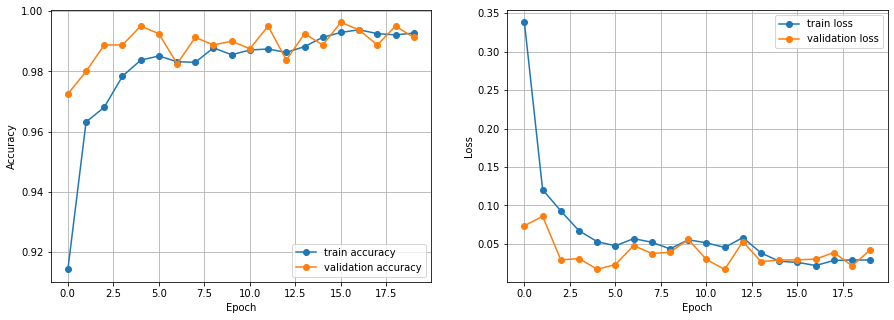

In [ ]:
model.save('fitted_model')
#Train Accuracy
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [ ]:
#Check Accuracy
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_accuracy)
print('\nTest Loss:', test_loss)


Test Accuracy: 0.983871

Test Loss: 0.058326458528397546
